<a href="https://colab.research.google.com/github/devdebdeb/ML-Classificacao/blob/main/Problemas_Multiclasse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
from sklearn.model_selection import train_test_split

##Análise exploratória

###Carregando os dados

In [ ]:
students = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/classificacao_multiclasse/main/Dados/dados_estudantes.csv')

In [ ]:
students.head()

,Estado civil,Migração,Sexo,Idade na matrícula,Estrangeiro,Necessidades educacionais especiais,Devedor,Taxas de matrícula em dia,Bolsista,Taxa de desemprego,...,disciplinas 1º semestre (aprovadas),disciplinas 1º semestre (notas),disciplinas 1º semestre (sem avaliações),disciplinas 2º semestre (creditadas),disciplinas 2º semestre (matriculadas),disciplinas 2º semestre (avaliações),disciplinas 2º semestre (aprovadas),disciplinas 2º semestre (notas),disciplinas 2º semestre (sem avaliações),Target
0,Solteiro,Sim,Masculino,20,Não,Não,Não,Sim,Não,10.8,...,0,0.000000,0,0,0,0,0,0.000000,0,Desistente
1,Solteiro,Sim,Masculino,19,Não,Não,Não,Não,Não,13.9,...,6,14.000000,0,0,6,6,6,13.666667,0,Graduado
2,Solteiro,Sim,Masculino,19,Não,Não,Não,Não,Não,10.8,...,0,0.000000,0,0,6,0,0,0.000000,0,Desistente
3,Solteiro,Sim,Feminino,20,Não,Não,Não,Sim,Não,9.4,...,6,13.428571,0,0,6,10,5,12.400000,0,Graduado
4,Casado,Não,Feminino,45,Não,Não,Não,Sim,Não,13.9,...,5,12.333333,0,0,6,6,6,13.000000,0,Graduado


###Entendendo os dados

In [ ]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 28 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Estado civil                              4424 non-null   object 
 1   Migração                                  4424 non-null   object 
 2   Sexo                                      4424 non-null   object 
 3   Idade na matrícula                        4424 non-null   int64  
 4   Estrangeiro                               4424 non-null   object 
 5   Necessidades educacionais especiais       4424 non-null   object 
 6   Devedor                                   4424 non-null   object 
 7   Taxas de matrícula em dia                 4424 non-null   object 
 8   Bolsista                                  4424 non-null   object 
 9   Taxa de desemprego                        4424 non-null   float64
 10  Taxa de inflação                    

In [ ]:
students['Target'].unique()
#Três valores que queremos prever

array(['Desistente', 'Graduado', 'Matriculado'], dtype=object)

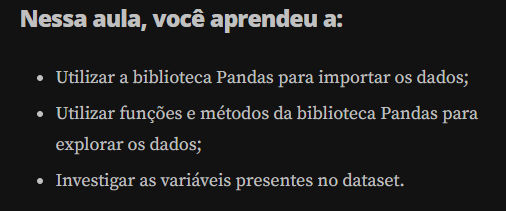

###Análise inicial dos dados

In [ ]:
students.describe()

,Idade na matrícula,Taxa de desemprego,Taxa de inflação,PIB,disciplinas 1º semestre (creditadas),disciplinas 1º semestre (matriculadas),disciplinas 1º semestre (avaliações),disciplinas 1º semestre (aprovadas),disciplinas 1º semestre (notas),disciplinas 1º semestre (sem avaliações),disciplinas 2º semestre (creditadas),disciplinas 2º semestre (matriculadas),disciplinas 2º semestre (avaliações),disciplinas 2º semestre (aprovadas),disciplinas 2º semestre (notas),disciplinas 2º semestre (sem avaliações)
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,23.265145,11.566139,1.228029,0.001969,0.709991,6.270570,8.299051,4.706600,10.640822,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316
std,7.587816,2.663850,1.382711,2.269935,2.360507,2.480178,4.179106,3.094238,4.843663,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774
min,17.000000,7.600000,-0.800000,-4.060000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,9.400000,0.300000,-1.700000,0.000000,5.000000,6.000000,3.000000,11.000000,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000
50%,20.000000,11.100000,1.400000,0.320000,0.000000,6.000000,8.000000,5.000000,12.285714,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000
75%,25.000000,13.900000,2.600000,1.790000,0.000000,7.000000,10.000000,6.000000,13.400000,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000
max,70.000000,16.200000,3.700000,3.510000,20.000000,26.000000,45.000000,26.000000,18.875000,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000


In [ ]:
colunas_categoricas = ['Estado civil', 'Migração', 'Sexo', 'Estrangeiro', 'Necessidades educacionais especiais', 'Devedor',  'Taxas de matrícula em dia', 'Bolsista', 'Curso', 'Período', 'Qualificação prévia', 'Target']

students[colunas_categoricas].describe()

,Estado civil,Migração,Sexo,Estrangeiro,Necessidades educacionais especiais,Devedor,Taxas de matrícula em dia,Bolsista,Curso,Período,Qualificação prévia,Target
count,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424
unique,6,2,2,2,2,2,2,2,17,2,17,3
top,Solteiro,Sim,Feminino,Não,Não,Não,Sim,Não,Enfermagem,Diurno,Educação secundária,Graduado
freq,3919,2426,2868,4314,4373,3921,3896,3325,766,3941,3717,2209


###Dados demograficos

In [ ]:
students['Estado civil'].value_counts(normalize=True)*100

,proportion
Estado civil,
Solteiro,88.584991
Casado,8.566908
Divorciado,2.056962
União Estável,0.565099
Legalmente Separado,0.135624
Viúvo,0.090416


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

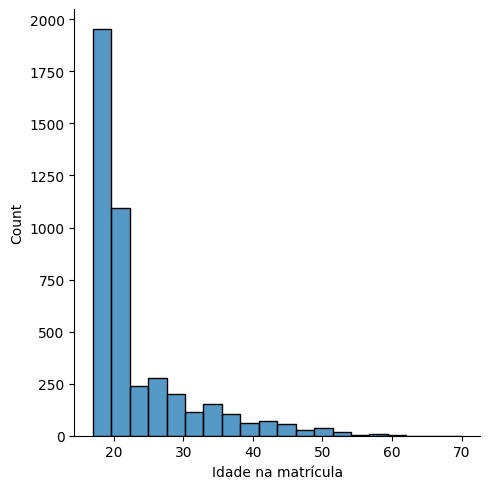

In [ ]:
sns.displot(students['Idade na matrícula'], bins=20)
plt.show()

In [ ]:
color_dict = {'Desistente': '#e34c42', 'Graduado': '#4dc471', 'Matriculado': '#3b71db'}
sns.set_palette(list(color_dict.values()))

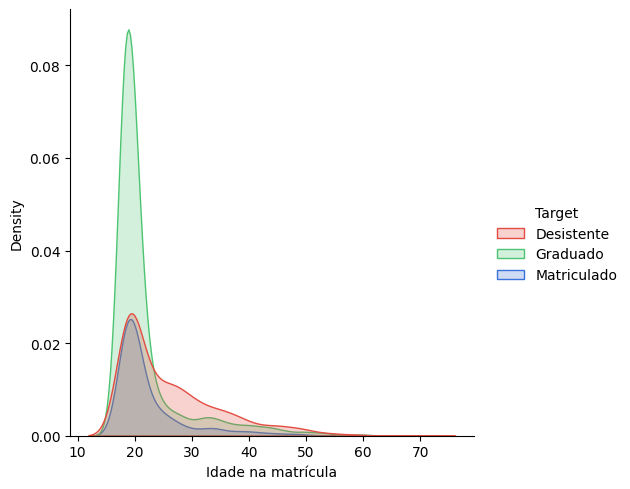

In [ ]:
sns.displot(data=students, x='Idade na matrícula', hue='Target', kind='kde', fill=True)
plt.show()

In [ ]:
students['Estrangeiro'].value_counts(normalize=True)*100

,proportion
Estrangeiro,
Não,97.513562
Sim,2.486438


In [ ]:
students['Sexo'].value_counts(normalize=True)*100

,proportion
Sexo,
Feminino,64.82821
Masculino,35.17179


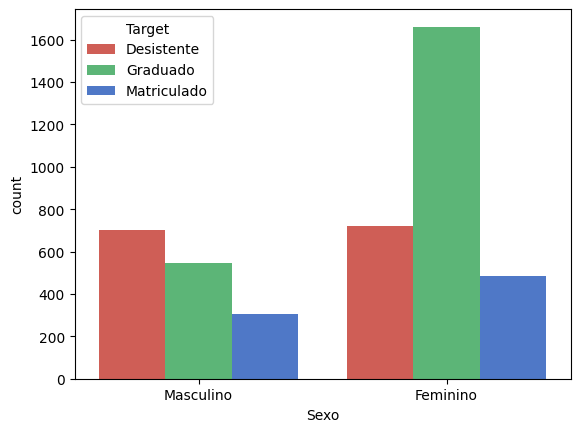

In [ ]:
sns.countplot(x='Sexo', hue='Target', data=students)
plt.show()

###Dados socioeconômicos e macroeconômicos

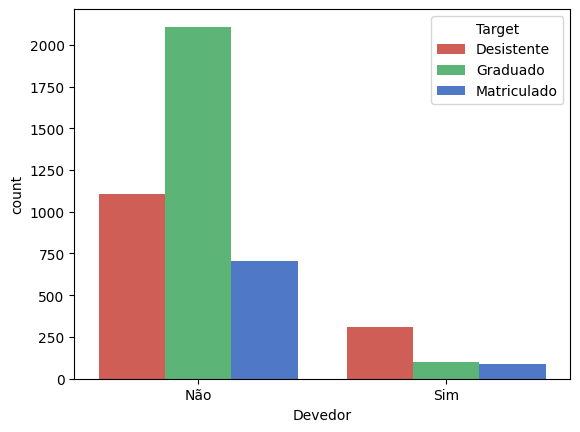

In [ ]:
sns.countplot(x='Devedor', hue='Target', data=students)
plt.show()

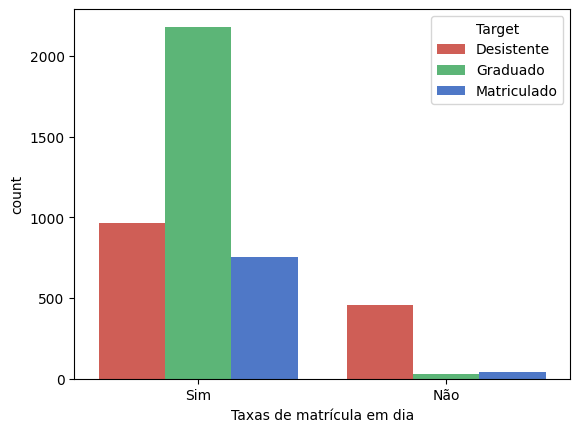

In [ ]:
sns.countplot(x='Taxas de matrícula em dia', hue='Target', data=students)
plt.show()

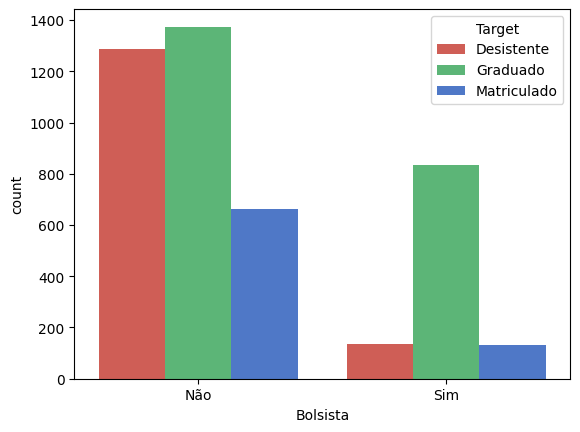

In [ ]:
sns.countplot(x='Bolsista', hue='Target', data=students)
plt.show()

###Dados no momento da matrícula

In [ ]:
import plotly.express as px

In [ ]:
contagem = students.groupby(['Curso', 'Target']).size().reset_index(name='Contagem')

contagem['Porcentagem'] = contagem.groupby('Curso')['Contagem'].transform(lambda x: (x/x.sum())*100)

fig = px.bar(contagem, y='Curso', x='Porcentagem', color='Target', orientation='h', color_discrete_map={'Desistente': '#e34c42', 'Graduado': '#4dc471', 'Matriculado': '#3b71db'})

fig.show()

###Dados acadêmicos

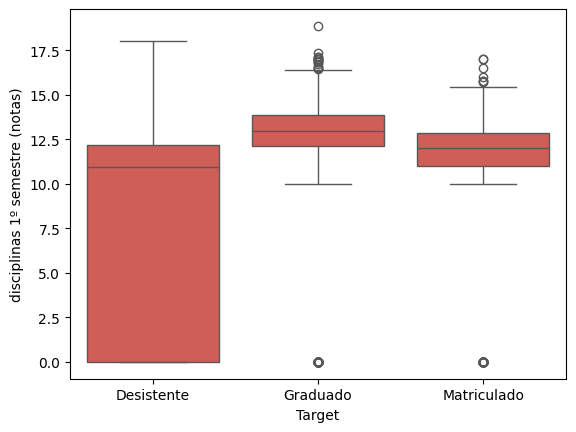

In [ ]:
sns.boxplot(x='Target', y='disciplinas 1º semestre (notas)', data=students)
plt.show()

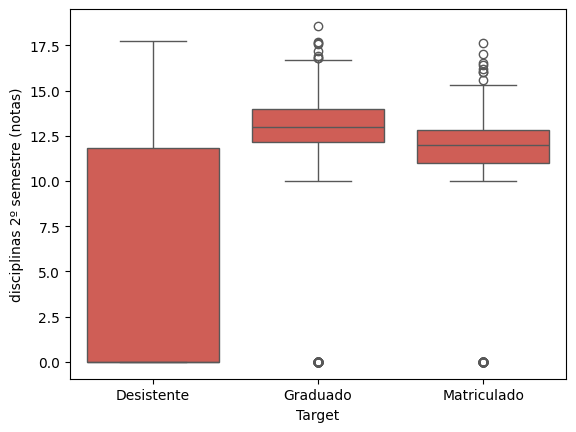

In [ ]:
sns.boxplot(x='Target', y='disciplinas 2º semestre (notas)', data=students)
plt.show()

In [ ]:
students['Target'].value_counts(normalize=True)*100

,proportion
Target,
Graduado,49.932188
Desistente,32.120253
Matriculado,17.947559


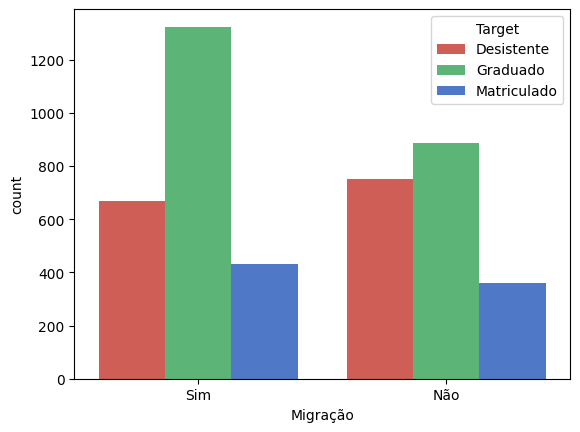

In [ ]:
sns.countplot(x='Migração', hue='Target', data=students)
plt.show()

In [ ]:
students.groupby('Target')['Necessidades educacionais especiais'].value_counts(normalize=True)*100

Target       Necessidades educacionais especiais
Desistente   Não                                    98.803659
             Sim                                     1.196341
Graduado     Não                                    98.958805
             Sim                                     1.041195
Matriculado  Não                                    98.614610
             Sim                                     1.385390
Name: proportion, dtype: float64

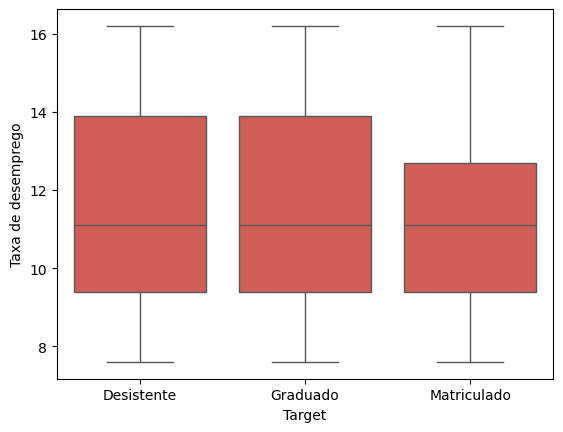

In [ ]:
sns.boxplot(x='Target', y='Taxa de desemprego', data=students)
plt.show()

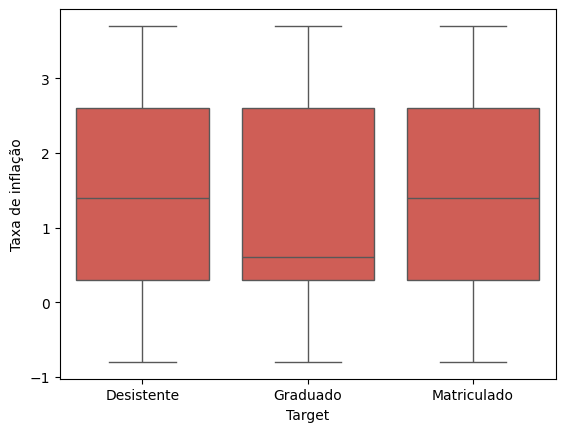

In [ ]:
sns.boxplot(x='Target', y='Taxa de inflação', data=students)
plt.show()

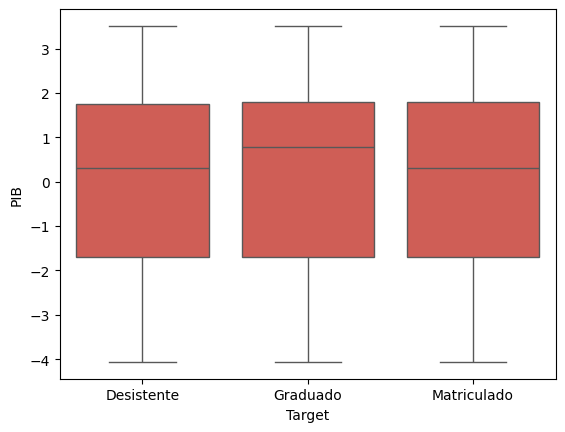

In [ ]:
sns.boxplot(x='Target', y='PIB', data=students)
plt.show()

In [ ]:
students['Qualificação prévia'].value_counts(normalize=True)*100

,proportion
Qualificação prévia,
Educação secundária,84.018987
Curso de especialização tecnológica,4.950271
Educação básica 3º ciclo (9º/10º/11º ano) ou equivalente,3.661844
Educação superior - licenciatura,2.848101
Outro - 11º ano de escolaridade,1.017179
Educação superior - licenciatura (1º ciclo),0.904159
Curso técnico superior profissional,0.813743
Educação superior - bacharelado,0.519892
Frequência de educação superior,0.361664


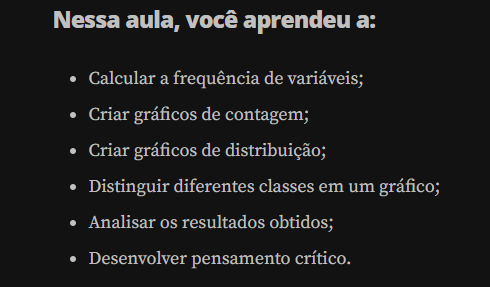

##Preparação do modelo

###Preparando os dados para o modelo

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
colunas_categoricas = ['Migração', 'Sexo','Estrangeiro', 'Necessidades educacionais especiais', 'Devedor',
                     'Taxas de matrícula em dia', 'Bolsista', 'Período','Estado civil', 'Curso', 'Qualificação prévia']

In [ ]:
encoder = OneHotEncoder(drop='if_binary')

students_categorico = students[colunas_categoricas]

students_encoded = pd.DataFrame(encoder.fit_transform(students_categorico).toarray(),
                          columns=encoder.get_feature_names_out(colunas_categoricas))

students_final = pd.concat([students.drop(colunas_categoricas, axis=1), students_encoded], axis=1)

In [ ]:
students_final

,Idade na matrícula,Taxa de desemprego,Taxa de inflação,PIB,disciplinas 1º semestre (creditadas),disciplinas 1º semestre (matriculadas),disciplinas 1º semestre (avaliações),disciplinas 1º semestre (aprovadas),disciplinas 1º semestre (notas),disciplinas 1º semestre (sem avaliações),...,Qualificação prévia_Educação básica 3º ciclo (9º/10º/11º ano) ou equivalente,Qualificação prévia_Educação secundária,Qualificação prévia_Educação superior - bacharelado,Qualificação prévia_Educação superior - doutorado,Qualificação prévia_Educação superior - licenciatura,Qualificação prévia_Educação superior - licenciatura (1º ciclo),Qualificação prévia_Educação superior - mestrado,Qualificação prévia_Educação superior - mestrado (2º ciclo),Qualificação prévia_Frequência de educação superior,Qualificação prévia_Outro - 11º ano de escolaridade
0,20,10.8,1.4,1.74,0,0,0,0,0.000000,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,19,13.9,-0.3,0.79,0,6,6,6,14.000000,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,19,10.8,1.4,1.74,0,6,0,0,0.000000,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,20,9.4,-0.8,-3.12,0,6,8,6,13.428571,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,45,13.9,-0.3,0.79,0,6,9,5,12.333333,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,19,15.5,2.8,-4.06,0,6,7,5,13.600000,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4420,18,11.1,0.6,2.02,0,6,6,6,12.000000,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4421,30,13.9,-0.3,0.79,0,7,8,7,14.912500,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4422,20,9.4,-0.8,-3.12,0,5,5,5,13.800000,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


###Separando os dados

In [ ]:
#features
X = students_final.drop('Target', axis=1)
#target
y = students_final['Target']

In [ ]:
X,X_test,y,y_test = train_test_split(X, y, test_size=0.15, stratify=y,random_state=0)
X_train,X_val,y_train,y_val = train_test_split(X, y, stratify=y, random_state=0)

###Modelo

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_model = RandomForestClassifier(random_state=0)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_val)
print(f'Training accuracy: {rf_model.score(X_train, y_train)}')
print(f'Validation accuracy {rf_model.score(X_val, y_val)}')
#Overfitting

Training accuracy: 0.9975177304964539
Validation accuracy 0.7680851063829788


In [ ]:
rf_model = RandomForestClassifier(random_state=0, max_depth=10)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_val)
print(f'Training accuracy: {rf_model.score(X_train, y_train)}')
print(f'Validation accuracy {rf_model.score(X_val, y_val)}')

Training accuracy: 0.898936170212766
Validation accuracy 0.7734042553191489


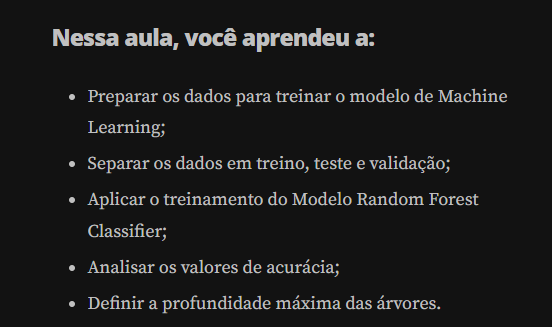

##Análise do modelo

###Conf matrix

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
#Matriz de confusão = linhas: val, colunas:pred
conf_matrix = confusion_matrix(y_val, y_pred)

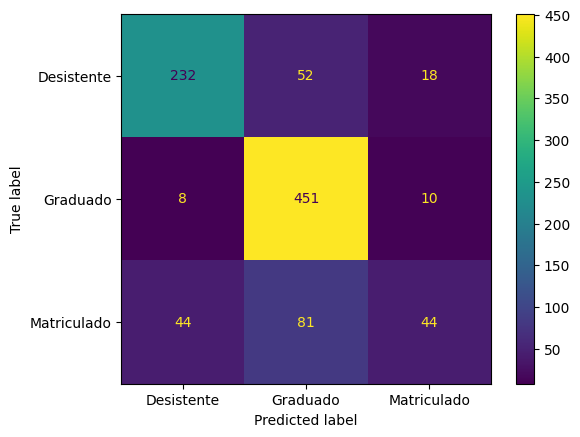

In [ ]:
visualizacao = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,display_labels=rf_model.classes_)
visualizacao.plot();

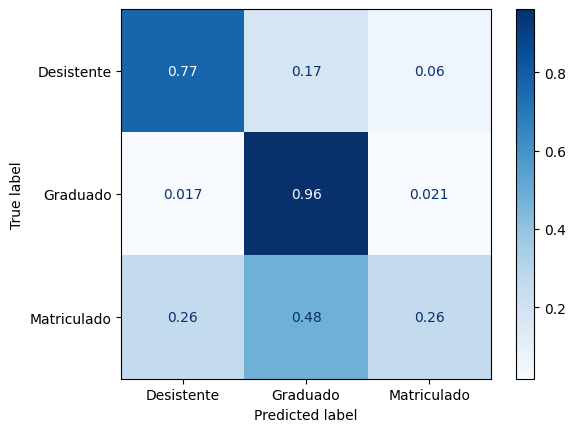

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_val, y_pred, normalize='true', cmap='Blues');

###Classification Report

In [ ]:
from sklearn.metrics import classification_report

  Taxa de acerto na classificação de positivos

Precision: VP/ (VP+FP)

  Proporção dos positivos que foram classificados corretamente versus incorretamente
  
  (alto recall é bom: raramente chama um positivo de negativo)

Recall: VP/ (VP+FN)



In [ ]:
report = classification_report(y_val, y_pred)
print(f'Relatório de Classificação:\n', report)

Relatório de Classificação:
               precision    recall  f1-score   support

  Desistente       0.82      0.77      0.79       302
    Graduado       0.77      0.96      0.86       469
 Matriculado       0.61      0.26      0.37       169

    accuracy                           0.77       940
   macro avg       0.73      0.66      0.67       940
weighted avg       0.76      0.77      0.75       940



##Balanceamento - Oversampling

    Inflar a quantidade de amostras na classe minoritária até todas as classes terem a mesma quantidade que a classe majoritária

In [ ]:
y_train.value_counts()

,count
Target,
Graduado,1408
Desistente,906
Matriculado,506


In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
oversample = SMOTE(random_state=0)
X_balanced, y_balanced = oversample.fit_resample(X_train, y_train)

In [ ]:
y_balanced.value_counts()

,count
Target,
Desistente,1408
Graduado,1408
Matriculado,1408


In [ ]:
balanced_model = RandomForestClassifier(random_state=0, max_depth=10)
balanced_model.fit(X_balanced, y_balanced)
y_pred = balanced_model.predict(X_val)

              precision    recall  f1-score   support

  Desistente       0.85      0.72      0.78       302
    Graduado       0.81      0.87      0.84       469
 Matriculado       0.48      0.52      0.50       169

    accuracy                           0.76       940
   macro avg       0.72      0.70      0.71       940
weighted avg       0.77      0.76      0.76       940



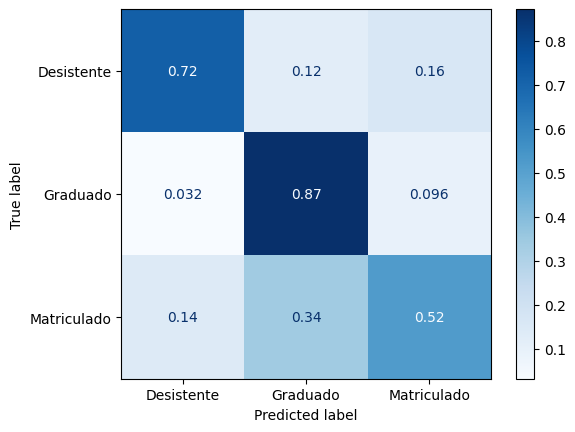

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_val, y_pred, normalize='true', cmap='Blues');
print(classification_report(y_val, y_pred))

###Desafio - Oversampling

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gbc_model = GradientBoostingClassifier()
gbc_model.fit(X_train,y_train)
y_pred = gbc_model.predict(X_val)

print(f'Training accuracy: {gbc_model.score(X_train, y_train)}')
print(f'Validation accuracy {gbc_model.score(X_val, y_val)}')

Training accuracy: 0.8411347517730496
Validation accuracy 0.7702127659574468


In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
oversample = SMOTE(random_state=0)
X_balanced, y_balanced = oversample.fit_resample(X_train, y_train)

In [ ]:
gbc_balanced = GradientBoostingClassifier()
gbc_balanced.fit(X_balanced, y_balanced)
y_pred = gbc_balanced.predict(X_val)

print(f'Training accuracy: {gbc_model.score(X_balanced, y_balanced)}')
print(f'Validation accuracy {gbc_model.score(X_val, y_val)}')

Training accuracy: 0.775094696969697
Validation accuracy 0.7702127659574468


In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

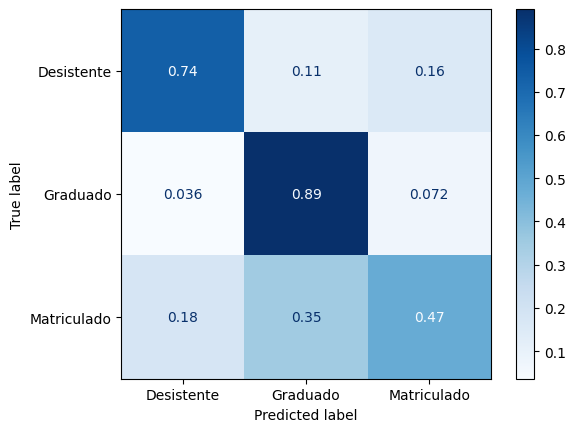

In [ ]:
ConfusionMatrixDisplay.from_estimator(gbc_balanced, X_val, y_val, normalize='true', cmap='Blues');

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
report = classification_report(y_val, y_pred)
print(f'Relatório de Classificação:\n', report)

Relatório de Classificação:
               precision    recall  f1-score   support

  Desistente       0.83      0.74      0.78       302
    Graduado       0.82      0.89      0.85       469
 Matriculado       0.50      0.47      0.48       169

    accuracy                           0.77       940
   macro avg       0.71      0.70      0.71       940
weighted avg       0.76      0.77      0.76       940



Antes do oversampling:

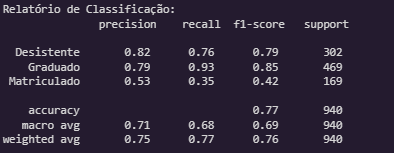

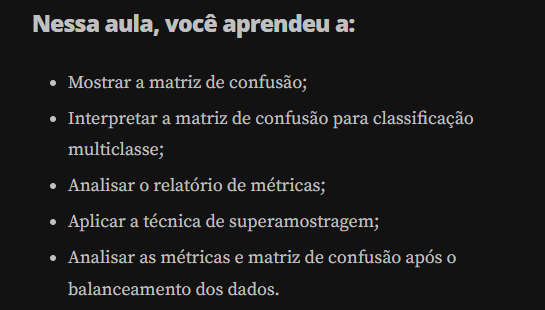

##Pipeline para validação

In [ ]:
from imblearn.pipeline import Pipeline as imbpipeline

In [ ]:
model = RandomForestClassifier(max_depth=10)
pipeline = imbpipeline([('oversample', SMOTE()), ('Random Forest', model)])

In [ ]:
from sklearn.model_selection import cross_validate, StratifiedKFold

In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
cv_results = cross_validate(pipeline, X, y, cv=skf,scoring='recall_weighted')
cv_results['test_score']

array([0.76462766, 0.73537234, 0.74601064, 0.77659574, 0.75132979])

##Intervalo conf

In [ ]:
mean = cv_results['test_score'].mean()
std = cv_results['test_score'].std()
print(f'Intervalo de confiança: [{mean-2*std}], [{min(mean+2*std, 1.0)}]')

Intervalo de confiança: [0.725965495352885], [0.7836089727322214]


##Teste do modelo

              precision    recall  f1-score   support

  Desistente       0.88      0.75      0.81       213
    Graduado       0.82      0.85      0.84       332
 Matriculado       0.50      0.59      0.54       119

    accuracy                           0.77       664
   macro avg       0.73      0.73      0.73       664
weighted avg       0.78      0.77      0.77       664



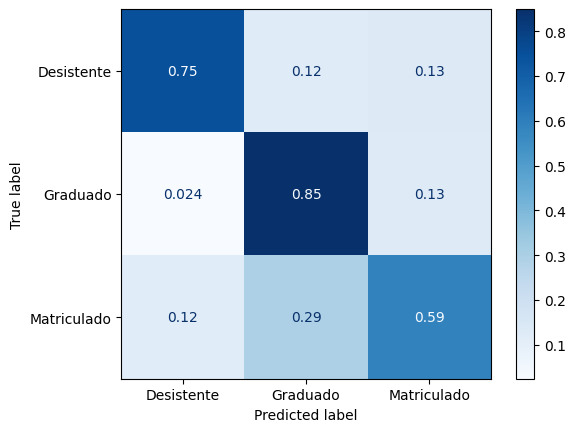

In [ ]:
oversample = SMOTE(random_state=0)
X_balanced, y_balanced = oversample.fit_resample(X, y)
final_model = RandomForestClassifier(random_state=0, max_depth=10)
final_model.fit(X_balanced, y_balanced)
y_pred = final_model.predict(X_test)

print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize='true', cmap='Blues');

#Teste de diferentes algorítmos

##tree.DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt_model = DecisionTreeClassifier(random_state=0)
dt_model.fit(X_train,y_train)
y_pred = dt_model.predict(X_val)
print(f'Training accuracy: {dt_model.score(X_train, y_train)}')
print(f'Validation accuracy {dt_model.score(X_val, y_val)}')
#Still overfitting

Training accuracy: 0.9975177304964539
Validation accuracy 0.6882978723404255


In [ ]:
dt_model = DecisionTreeClassifier(random_state=0, max_depth=10)
dt_model.fit(X_train,y_train)
y_pred = dt_model.predict(X_val)
print(f'Training accuracy: {dt_model.score(X_train, y_train)}')
print(f'Validation accuracy {dt_model.score(X_val, y_val)}')

Training accuracy: 0.8776595744680851
Validation accuracy 0.7457446808510638


##tree.ExtraTreeClassifier

In [ ]:
from sklearn.tree import ExtraTreeClassifier

In [ ]:
et_model = ExtraTreeClassifier(random_state=0)
et_model.fit(X_train,y_train)
y_pred = et_model.predict(X_val)
print(f'Training accuracy: {dt_model.score(X_train, y_train)}')
print(f'Validation accuracy {dt_model.score(X_val, y_val)}')

Training accuracy: 0.8776595744680851
Validation accuracy 0.7457446808510638


In [ ]:
et_model = ExtraTreeClassifier(random_state=0, max_depth=10)
et_model.fit(X_train,y_train)
y_pred=et_model.predict(X_val)
print(f'Training accuracy: {dt_model.score(X_train, y_train)}')
print(f'Validation accuracy {dt_model.score(X_val, y_val)}')
#Não mudou nada

Training accuracy: 0.8776595744680851
Validation accuracy 0.7457446808510638


##neighbors.KNeighborsClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knc_model = KNeighborsClassifier(n_neighbors=8)
knc_model.fit(X_train,y_train)
y_pred = knc_model.predict(X_val)
print(f'Training accuracy: {knc_model.score(X_train, y_train)}')
print(f'Validation accuracy {knc_model.score(X_val, y_val)}')
#Less overfitting but poor no acurracy improvement overall

Training accuracy: 0.7656028368794326
Validation accuracy 0.7297872340425532


##linear_model.LogisticRegression (setting multi_class="multinomial")

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr_model = LogisticRegression(multi_class="multinomial")
lr_model.fit(X_train,y_train)
y_pred = lr_model.predict(X_val)
print(f'Training accuracy: {lr_model.score(X_train, y_train)}')
print(f'Validation accuracy {lr_model.score(X_val, y_val)}')
#Almost no overfitting and slight acuraccy improvement

Training accuracy: 0.7808510638297872
Validation accuracy 0.7734042553191489


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [ ]:
#Pesquisei o output anterior no chatgpt para achar o que era
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_val)

lr_model = LogisticRegression(max_iter=200, multi_class="multinomial")
lr_model.fit(X_train_scaled, y_train)

print(f'Training accuracy: {lr_model.score(X_train, y_train)}')
print(f'Validation accuracy {lr_model.score(X_val, y_val)}')

Training accuracy: 0.7404255319148936
Validation accuracy 0.7468085106382979


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names



##linear_model.RidgeClassifier

In [ ]:
from sklearn.linear_model import RidgeClassifier

In [ ]:
rc_model = RidgeClassifier()
rc_model.fit(X_train,y_train)
y_pred = rc_model.predict(X_val)
print(f'Training accuracy: {rc_model.score(X_train, y_train)}')
print(f'Validation accuracy {rc_model.score(X_val, y_val)}')

Training accuracy: 0.7737588652482269
Validation accuracy 0.7510638297872341


##ensemble.GradientBoostingClassifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gbc_model = GradientBoostingClassifier()
gbc_model.fit(X_train,y_train)
y_pred = gbc_model.predict(X_val)

print(f'Training accuracy: {gbc_model.score(X_train, y_train)}')
print(f'Validation accuracy {gbc_model.score(X_val, y_val)}')

Training accuracy: 0.8411347517730496
Validation accuracy 0.7691489361702127


In [ ]:
print(f'Relatório de Classificação:\n', classification_report(y_val, y_pred))

Relatório de Classificação:
               precision    recall  f1-score   support

  Desistente       0.82      0.75      0.79       302
    Graduado       0.79      0.93      0.85       469
 Matriculado       0.53      0.36      0.43       169

    accuracy                           0.77       940
   macro avg       0.71      0.68      0.69       940
weighted avg       0.75      0.77      0.76       940



###Automatizar a busca pelos melhores valores dos parâmetros:

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.7, 0.8, 0.9]
}

grid_search = GridSearchCV(GradientBoostingClassifier(), param_grid, cv=3)
grid_search.fit(X_train, y_train)

# Melhores hiperparâmetros
print(grid_search.best_params_)


{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.7}


#Patologias de pele


In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/classificacao_multiclasse/main/Dados/dermatology_database_1.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   erythema                             366 non-null    int64 
 1   scaling                              366 non-null    int64 
 2   definite_borders                     366 non-null    int64 
 3   itching                              366 non-null    int64 
 4   koebner_phenomenon                   366 non-null    int64 
 5   polygonal_papules                    366 non-null    int64 
 6   follicular_papules                   366 non-null    int64 
 7   oral_mucosal_involvement             366 non-null    int64 
 8   knee_and_elbow_involvement           366 non-null    int64 
 9   scalp_involvement                    366 non-null    int64 
 10  family_history                       366 non-null    int64 
 11  melanin_incontinence                 366 non-

In [ ]:
df.describe()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,focal_hypergranulosis,disappearance_granular_layer,vacuolisation_damage_basal_layer,spongiosis,saw_tooth_appearance_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_mononuclear_infiltrate,band_like_infiltrate,class
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,...,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,2.068306,1.795082,1.549180,1.366120,0.633880,0.448087,0.166667,0.377049,0.614754,0.519126,...,0.393443,0.464481,0.456284,0.953552,0.453552,0.103825,0.114754,1.866120,0.554645,2.803279
std,0.664753,0.701527,0.907525,1.138299,0.908016,0.957327,0.570588,0.834147,0.982979,0.905639,...,0.849406,0.864899,0.954873,1.130172,0.954744,0.450433,0.488723,0.726108,1.105908,1.597803
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
50%,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,3.000000
75%,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,4.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,6.000000


#Vinhos

In [ ]:
import pandas as pd
df  = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/classificacao_multiclasse/main/Dados/df_vinho.csv')
df.head()

,acidez fixa,acidez volátil,ácido cítrico,açúcar residual,cloretos,dióxido de enxofre livre,dióxido de enxofre total,densidade,pH,sulfatos,álcool,qualidade
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,mediano
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,mediano
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,mediano
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,mediano
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,mediano


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1359 entries, 0 to 1358
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   acidez fixa                1359 non-null   float64
 1   acidez volátil             1359 non-null   float64
 2   ácido cítrico              1359 non-null   float64
 3   açúcar residual            1359 non-null   float64
 4   cloretos                   1359 non-null   float64
 5   dióxido de enxofre livre   1359 non-null   float64
 6   dióxido de enxofre total   1359 non-null   float64
 7   densidade                  1359 non-null   float64
 8   pH                         1359 non-null   float64
 9   sulfatos                   1359 non-null   float64
 10  álcool                     1359 non-null   float64
 11  qualidade                  1359 non-null   object 
dtypes: float64(11), object(1)
memory usage: 127.5+ KB


In [ ]:
X = df.drop('qualidade', axis=1)
y = df['qualidade']

In [ ]:
X, X_test, y, y_test = train_test_split(X, y, test_size=0.15,stratify=y, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

ex_model = RandomForestClassifier(random_state=0, max_depth=4)
ex_model.fit(X_train, y_train)
y_pred = ex_model.predict(X_val)
print(f'Acurácia de treino: {ex_model.score(X_train, y_train)}')
print(f'Acurácia de validação: {ex_model.score(X_val, y_val)}')

Acurácia de treino: 0.8545034642032333
Acurácia de validação: 0.8477508650519031


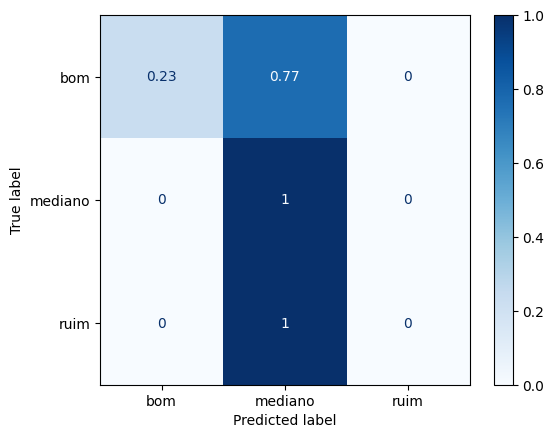

In [ ]:
ConfusionMatrixDisplay.from_estimator(ex_model, X_val, y_val, normalize='true', cmap='Blues');

In [ ]:
from sklearn.metrics import classification_report

report = classification_report(y_val, y_pred)
print("Relatório de Classificação:\n", report)

Relatório de Classificação:
               precision    recall  f1-score   support

         bom       1.00      0.23      0.38        39
     mediano       0.84      1.00      0.91       236
        ruim       0.00      0.00      0.00        14

    accuracy                           0.85       289
   macro avg       0.61      0.41      0.43       289
weighted avg       0.82      0.85      0.80       289



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
y_train.value_counts()
#Considerar o balanceamento dos dados

,count
qualidade,
mediano,709
bom,117
ruim,40


              precision    recall  f1-score   support

         bom       0.36      0.77      0.49        39
     mediano       0.92      0.56      0.69       236
        ruim       0.13      0.57      0.21        14

    accuracy                           0.59       289
   macro avg       0.47      0.63      0.47       289
weighted avg       0.80      0.59      0.64       289



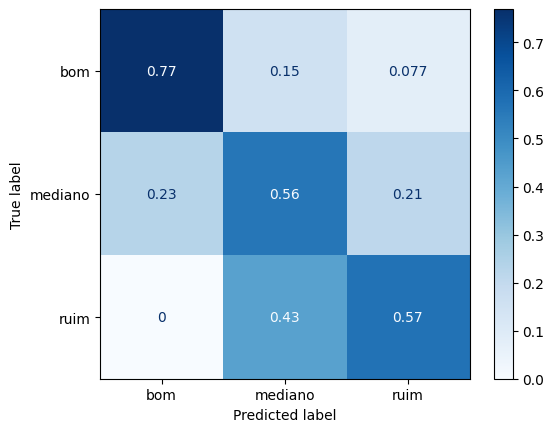

In [ ]:
oversample = SMOTE(random_state=0)
X_balanced, y_balanced = oversample.fit_resample(X_train, y_train)
wine_model = RandomForestClassifier(random_state=0, max_depth=4)
wine_model.fit(X_balanced, y_balanced)
y_pred = wine_model.predict(X_val)
print(classification_report(y_val, y_pred))
ConfusionMatrixDisplay.from_predictions(y_val, y_pred, normalize='true', cmap='Blues');

In [ ]:
from imblearn.pipeline import Pipeline as imbpipeline
modelo = RandomForestClassifier(max_depth = 4)
pipeline = imbpipeline([('oversample', SMOTE()), ('floresta', modelo)])

In [ ]:
from sklearn.model_selection import cross_validate, StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
cv_resultados = cross_validate(pipeline, X, y, cv=skf, scoring='recall_weighted')
cv_resultados['test_score']

array([0.60606061, 0.65367965, 0.6017316 , 0.65367965, 0.63203463])

In [ ]:
media = cv_resultados['test_score'].mean()
desvio_padrao = cv_resultados['test_score'].std()
print(f'Intervalo de confiança: [{media-2*desvio_padrao}, {min(media+2*desvio_padrao, 1.0)}]')

Intervalo de confiança: [0.5847498254525926, 0.6741246334218666]


              precision    recall  f1-score   support

         bom       0.45      0.89      0.60        28
     mediano       0.96      0.69      0.81       167
        ruim       0.18      0.56      0.27         9

    accuracy                           0.72       204
   macro avg       0.53      0.71      0.56       204
weighted avg       0.86      0.72      0.75       204



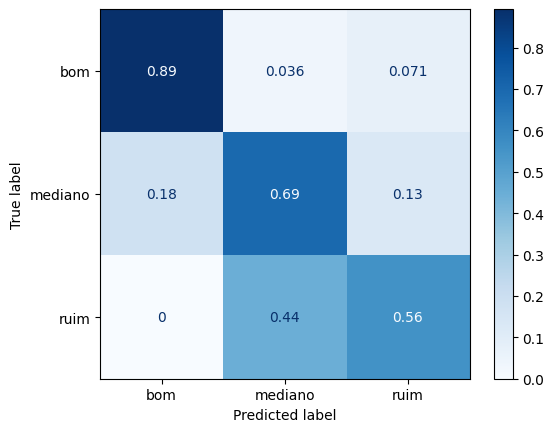

In [ ]:
oversample = SMOTE(random_state=0)
X_balanced, y_balanced = oversample.fit_resample(X, y)
modelo = RandomForestClassifier(random_state=0, max_depth=4)
modelo.fit(X_balanced, y_balanced)
y_pred = modelo.predict(X_test)

print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize='true', cmap='Blues');

#Iris de flores

In [ ]:
iris = pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
X = iris.drop('species', axis=1)
y = iris['species']

In [ ]:
X, X_test, y, y_test = train_test_split(X, y, test_size=0.15,stratify=y, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

ex_model = RandomForestClassifier(random_state=0, max_depth=10)
ex_model.fit(X_train, y_train)
y_pred = ex_model.predict(X_val)
print(f'Acurácia de treino: {ex_model.score(X_train, y_train)}')
print(f'Acurácia de validação: {ex_model.score(X_val, y_val)}')

Acurácia de treino: 1.0
Acurácia de validação: 0.96875


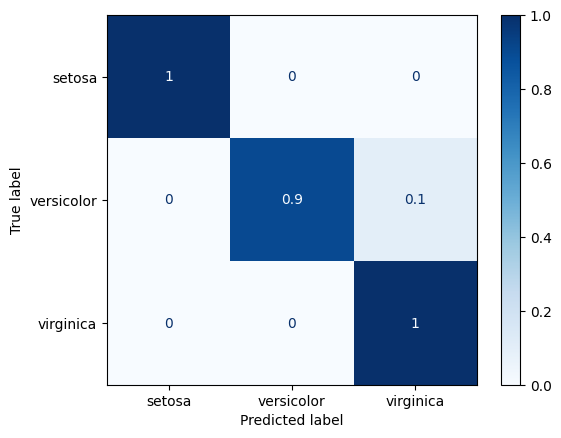

In [ ]:
ConfusionMatrixDisplay.from_estimator(ex_model, X_val, y_val, normalize='true', cmap='Blues');

In [ ]:
from sklearn.metrics import classification_report

report = classification_report(y_val, y_pred)
print("Relatório de Classificação:\n", report)

Relatório de Classificação:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      0.90      0.95        10
   virginica       0.92      1.00      0.96        11

    accuracy                           0.97        32
   macro avg       0.97      0.97      0.97        32
weighted avg       0.97      0.97      0.97        32

